# Proyek Analisis Data: Bike Sharing
- **Nama:** Ari Hasan
- **Email:** arihasan25j@gmail.com
- **ID Dicoding:** arihasan25

## Menentukan Pertanyaan Bisnis

- Apakah terdapat tren atau perubahan signifikan jumlah user (cnt) dalam peminjaman sepeda dari tahun 2011 hingga tahun 2012?
- Apakah perbedaan musim memberikan pengaruh yang signifikan terhadap terhadap jumlah user (cnt) dalam peminjaman sepeda?
- Bagaimana kondisi cuaca dapat mempengaruhi jumlah user (cnt) dalam peminjaman sepeda?
- Apakah terdapat korelasi antara suhu (temp) dan jumlah user (cnt) dalam peminjaman sepeda?
- Bagimana persebaran jumlah user (cnt) tiap harinya (weekdays) 
- Bagaimana tren peminjaman sepeda tiap jam nya?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv("dataset/day.csv", delimiter=",")
df_day.head(-5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,722,2012-12-22,1,1,12,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205,1544,1749
722,723,2012-12-23,1,1,12,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787
723,724,2012-12-24,1,1,12,0,1,1,2,0.231304,0.258900,0.791304,0.077230,174,746,920
724,725,2012-12-25,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440,573,1013


In [3]:
df_hour = pd.read_csv("dataset/hour.csv", delimiter=",")
df_hour.head(-5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17369,17370,2012-12-31,1,1,12,14,0,1,1,2,0.28,0.2727,0.45,0.2239,62,185,247
17370,17371,2012-12-31,1,1,12,15,0,1,1,2,0.28,0.2879,0.45,0.1343,69,246,315
17371,17372,2012-12-31,1,1,12,16,0,1,1,2,0.26,0.2576,0.48,0.1940,30,184,214
17372,17373,2012-12-31,1,1,12,17,0,1,1,2,0.26,0.2879,0.48,0.0896,14,150,164


### Assessing Data

Melihat tipe data pada masing-masing kolom dan melihat ringkasan pada data

In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan hasil observasi pada kedua dataframe, dteday seharusnya bertipe date-time sedangkan pada daaframe tersebut masih bertipe object

Mencari Missing Value

In [6]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value pada kedua data frame tersebut

Melakukan cek Duplikasi data

In [8]:
print('Jumlah Duplikasi df_day:', df_day.duplicated().sum())

Jumlah Duplikasi df_day: 0


In [9]:
print('Jumlah Duplikasi df_hour:', df_hour.duplicated().sum())

Jumlah Duplikasi df_hour: 0


Tidak ada duplikasi pada kedua dataframe

Descriptive Statistics

In [10]:

df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Merubah tipe data kolom dteday menjadi tipe data datetime 

In [12]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    df_day[column] = pd.to_datetime(df_day[column])
    df_hour[column] = pd.to_datetime(df_hour[column])

In [13]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)

kita kembalikan ke nilai yang belum di normalisasi, agar lebih masuk akal saat dibuat grafik

In [15]:
df_day["temp"] = df_day["temp"] * 41
df_day["atemp"] = df_day["atemp"] * 50
df_day["hum"] = df_day["hum"] * 100
df_day["windspeed"] = df_day["windspeed"] * 67

In [16]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
df_hour["temp"] = df_hour["temp"] * 41

df_hour["atemp"] = df_hour["atemp"] * 50
df_hour["hum"] = df_hour["hum"] * 100
df_hour["windspeed"] = df_hour["windspeed"] * 67

In [18]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0,0,1,1


- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week 
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- So Monday is 1 (0:Sunday, 1:Monday, 2:Tuesday, 3:Wednesday, 4:Thursday, 5:Friday, 6: Saturday)

Mengembalikan nilai integer yang mewakili variabel kategorik

In [19]:
#df_day["yr"] = df_day["yr"].map({0: 2011, 1: 2012})
#df_hour["yr"] = df_hour["yr"].map({0: 2011, 1: 2012})

#atau dapat membuat fungsi agar tidak melakukan map dua kali pada kedua dataframe untuk kolom yang sama

def map_year(df):
    df["yr"] = df["yr"].map({0: 2011, 1: 2012})
    return df

df_day = map_year(df_day)
df_hour = map_year(df_hour) 

#membuat semua fungsi untuk melakukan map pada kolom yang di inginkan

def map_season(df):
    df["season"] = df["season"].map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"})
    return df

df_day = map_season(df_day)
df_hour = map_season(df_hour)

def map_weekdays(df):
    df["weekday"] = df["weekday"].map({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6: "Saturday"})
    return df

df_day = map_weekdays(df_day)
df_hour = map_weekdays(df_hour)

def map_mnth(df):
    df["mnth"] = df["mnth"].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
    })
    return df

df_day = map_mnth(df_day)
df_hour = map_mnth(df_hour)

def map_weather(df):
    df["weathersit"] = df["weathersit"].map({
    1: 'Clear',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Tunderstorm/Fog Snow'
    })
    return df

df_day = map_weather(df_day)
df_hour = map_weather(df_hour)


In [20]:
df_day.head(-5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Misty/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Misty/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,722,2012-12-22,Spring,2012,December,0,Saturday,0,Clear,10.899153,11.80565,44.1250,27.292182,205,1544,1749
722,723,2012-12-23,Spring,2012,December,0,Sunday,0,Clear,10.079153,12.97355,51.5417,8.916561,408,1379,1787
723,724,2012-12-24,Spring,2012,December,0,Monday,1,Misty/Cloudy,9.483464,12.94500,79.1304,5.174437,174,746,920
724,725,2012-12-25,Spring,2012,December,1,Tuesday,0,Misty/Cloudy,11.943464,14.72325,73.4783,11.304642,440,573,1013


In [21]:
df_hour.head(-5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,Clear,9.84,14.395,81.0,0.0000,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,Clear,9.02,13.635,80.0,0.0000,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,Clear,9.02,13.635,80.0,0.0000,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,0,Clear,9.84,14.395,75.0,0.0000,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,0,Clear,9.84,14.395,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17369,17370,2012-12-31,Spring,2012,December,14,0,Monday,1,Misty/Cloudy,11.48,13.635,45.0,15.0013,62,185,247
17370,17371,2012-12-31,Spring,2012,December,15,0,Monday,1,Misty/Cloudy,11.48,14.395,45.0,8.9981,69,246,315
17371,17372,2012-12-31,Spring,2012,December,16,0,Monday,1,Misty/Cloudy,10.66,12.880,48.0,12.9980,30,184,214
17372,17373,2012-12-31,Spring,2012,December,17,0,Monday,1,Misty/Cloudy,10.66,14.395,48.0,6.0032,14,150,164


In [22]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [23]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore Data Pertanyaan 1

In [24]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,January,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,0.028728,NaN,0.683995,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,1.000000,NaN,1.000000,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [25]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,May,NaN,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,0.028770,NaN,0.682721,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,0.000000,NaN,0.000000,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,0.000000,NaN,1.000000,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,0.000000,NaN,1.000000,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,1.000000,NaN,1.000000,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


Melihat tren perubahan jumlah user (cnt) pada tahun 2011 hingga tahun 2012 pada data df_day dan df_hour tiap bulannya

In [26]:
df_day.groupby(by ="yr").agg({
    "casual" : ["max", "min", "mean", "sum"],
    "registered" : ["max", "min", "mean", "sum"],
    "cnt" : ["max", "min", "mean", "sum"]
})

casual                          registered                             \
        max min         mean     sum        max  min         mean      sum   
yr                                                                           
2011   3065   9   677.402740  247252       4614  416  2728.358904   995851   
2012   3410   2  1018.483607  372765       6946   20  4581.450820  1676811   

       cnt                             
       max  min         mean      sum  
yr                                     
2011  6043  431  3405.761644  1243103  
2012  8714   22  5599.934426  2049576

In [27]:
df_day.groupby(by="mnth", observed=True).agg({
    "cnt" : ["max", "min", "mean", "sum"]
})

cnt                           
            max   min         mean     sum
mnth                                      
April      7460   795  4484.900000  269094
August     7865  1115  5664.419355  351194
December   6606   441  3403.806452  211036
February   5062  1005  2655.298246  151352
January    4521   431  2176.338710  134933
July       8173  3285  5563.677419  344948
June       8120  3767  5772.366667  346342
March      8362   605  3692.258065  228920
May        8294  2633  5349.774194  331686
November   6852  1495  4247.183333  254831
October    8156    22  5199.225806  322352
September  8714  1842  5766.516667  345991

In [28]:
df_hour.groupby(by="yr").agg({
    "casual" : ["max", "min", "mean", "sum"],
    "registered" : ["max", "min", "mean", "sum"],
    "cnt" : ["max", "min", "mean", "sum"]
})

casual                        registered                           cnt  \
        max min       mean     sum        max min        mean      sum  max   
yr                                                                            
2011    272   0  28.600578  247252        567   0  115.193869   995851  651   
2012    367   0  42.679757  372765        886   0  191.986604  1676811  977   

                               
     min        mean      sum  
yr                             
2011   1  143.794448  1243103  
2012   1  234.666361  2049576

In [29]:
df_hour.groupby(by="mnth", observed=True).agg({
    "cnt" : ["max", "min", "mean", "sum"]
})

cnt                        
           max min        mean     sum
mnth                                  
April      822   1  187.260960  269094
August     941   1  238.097627  351194
December   759   1  142.303439  211036
February   610   1  112.865026  151352
January    559   1   94.424773  134933
July       913   1  231.819892  344948
June       900   1  240.515278  346342
March      957   1  155.410726  228920
May        873   1  222.907258  331686
November   729   1  177.335421  254831
October    963   1  222.158511  322352
September  977   1  240.773138  345991

Kedua dataframe menunjukkan bahwa terjadi kenaikan user dari tahun 2011 ke 2012

### Explore Data Pertanyaan 2

Melihat persebaran jumlah user (cnt) berdasarkan musim pada df_day dan df_hour

In [30]:
df_day.groupby(by="season").agg({
    "casual" : ["max", "min", "mean", "sum"],
    "registered" : ["max", "min", "mean", "sum"],
    "cnt" : ["max", "min", "mean", "sum"]
})

casual                           registered                            \
          max  min         mean     sum        max  min         mean     sum   
season                                                                         
Fall     3160  118  1202.611702  226091       6917  889  4441.691489  835038   
Spring   3155    9   334.928177   60622       5315  416  2269.204420  410726   
Summer   3410  120  1106.097826  203522       6456  674  3886.233696  715067   
Winter   3031    2   729.112360  129782       6946   20  3999.050562  711831   

         cnt                              
         max   min         mean      sum  
season                                    
Fall    8714  1115  5644.303191  1061129  
Spring  7836   431  2604.132597   471348  
Summer  8362   795  4992.331522   918589  
Winter  8555    22  4728.162921   841613

In [31]:
df_hour.groupby(by="season").agg({
    "casual" : ["max", "min", "mean", "sum"],
    "registered" : ["max", "min", "mean", "sum"],
    "cnt" : ["max", "min", "mean", "sum"]
})

casual                        registered                          cnt  \
          max min       mean     sum        max min        mean     sum  max   
season                                                                         
Fall      350   0  50.287144  226091        886   0  185.729093  835038  977   
Spring    367   0  14.290901   60622        681   0   96.823668  410726  801   
Summer    361   0  46.160581  203522        782   0  162.183488  715067  957   
Winter    362   0  30.666824  129782        876   0  168.202032  711831  967   

                                 
       min        mean      sum  
season                           
Fall     1  236.016237  1061129  
Spring   1  111.114569   471348  
Summer   1  208.344069   918589  
Winter   1  198.868856   841613

### Eksplore Data Pertanyaan 3

Bagaimana pengaruh kondisi cuaca (weathersit) dengan jumlah user (cnt) dalam df_day dan df_hour
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [32]:
df_day.groupby(by="weathersit").agg({
    "casual" : ["max", "min", "mean", "sum"],
    "registered" : ["max", "min", "mean", "sum"],
    "cnt" : ["max", "min", "mean", "sum"]
})

casual                         registered                    \
                   max min        mean     sum        max  min         mean   
weathersit                                                                    
Clear             3410  15  964.030238  446346       6946  416  3912.755940   
Light Snow/Rain   1264   2  185.476190    3895       4324   20  1617.809524   
Misty/Cloudy      3155   9  687.352227  169776       6844  491  3348.510121   

                           cnt                             
                     sum   max  min         mean      sum  
weathersit                                                 
Clear            1811606  8714  431  4876.786177  2257952  
Light Snow/Rain    33974  4639   22  1803.285714    37869  
Misty/Cloudy      827082  8362  605  4035.862348   996858

In [33]:
df_hour.groupby(by="weathersit").agg({
    "casual" : ["max", "min", "mean", "sum"],
    "registered" : ["max", "min", "mean", "sum"],
    "cnt" : ["max", "min", "mean", "sum"]
})

casual                        registered                  \
                        max min       mean     sum        max min        mean   
weathersit                                                                      
Clear                   367   0  40.545431  462745        886   0  164.323841   
Light Snow/Rain         263   0  16.055673   22783        791   0   95.523608   
Misty/Cloudy            350   0  29.595290  134481        822   0  145.570202   
Tunderstorm/Fog Snow      6   1   2.666667       8        158  22   71.666667   

                               cnt                           
                          sum  max min        mean      sum  
weathersit                                                   
Clear                 1875428  977   1  204.869272  2338173  
Light Snow/Rain        135548  891   1  111.579281   158331  
Misty/Cloudy           661471  957   1  175.165493   795952  
Tunderstorm/Fog Snow      215  164  23   74.333333      223

kedua dataframe menunjukkan bahwa jumlah user paling banyak saat cuaca cerah 

### Eksplore Data Pertanyaan 4

Bagaimana suhu (temp) dapat mempengaruhi jumlah user (cnt)

In [34]:
df_day.groupby(by="temp").agg({
    "cnt" : ["max", "min", "mean", "sum"]
})

cnt                    
            max   min    mean   sum
temp                               
2.424346    981   981   981.0   981
3.957390    986   986   986.0   986
3.993043   1416  1416  1416.0  1416
4.407500   2368  2368  2368.0  2368
5.227500   1529  1529  1529.0  1529
...         ...   ...     ...   ...
34.200847  5463  5463  5463.0  5463
34.371653  3846  3846  3846.0  3846
34.781653  3387  3387  3387.0  3387
34.815847  3285  3285  3285.0  3285
35.328347  4840  4840  4840.0  4840

[499 rows x 4 columns]

In [35]:
df_hour.groupby(by="temp").agg({
    "cnt" : ["max", "min", "mean", "sum"]
})

cnt                         
       max  min        mean     sum
temp                               
0.82   315    1   41.882353     712
1.64   180    1   35.625000     570
2.46   102    2   42.000000     672
3.28    84    1   28.235294     480
4.10   417    1   49.294118    2514
4.92   423    1   58.421053    4440
5.74   245    1   55.108696    7605
6.56   501    1   65.578261   15083
7.38   471    1   60.116129    9318
8.20   679    1   79.745763   28230
9.02   729    1   69.914489   29434
9.84   692    1   80.159004   41843
10.66  688    1   87.960644   49170
11.48  691    1  106.750831   32132
12.30  668    1  115.917317   74303
13.12  711    1  134.230769   82015
13.94  724    1  135.308527   87274
14.76  731    1  147.842027   99202
15.58  798    1  164.212366   61087
16.40  817    1  167.441368  102809
17.22  745    1  175.341241   96087
18.04  835    1  158.907298   80566
18.86  837    1  162.906977   91065
19.68  805    2  190.434028   54845
20.50  839    1  198.429379  105366
21.32  943    1  202.967626  112850
22.14  888    1  200.284710  113962
22.96  856    1  213.740933  123756
23.78  948    1  222.065574   67730
24.60  900    2  222.081481  149905
25.42  968    1  204.111570  148185
26.24  976    1  223.966763  154985
27.06  977    1  225.402597  156204
27.88  938    3  209.538682   73129
28.70  970    2  256.953623  177298
29.52  957    2  286.752632  163449
30.34  953    4  313.153101  161587
31.16  891    4  342.575758  135660
31.98  872    6  313.195266   52930
32.80  913   22  347.375385  112897
33.62  897   48  339.690141   72354
34.44  794   67  325.818841   44963
35.26  810   94  322.954198   42307
36.08  705  102  363.660377   19274
36.90  772  106  309.288889   27836
37.72  770  118  320.020408   15681
38.54  374  104  217.058824    3690
39.36  464  101  274.500000    4392
40.18  539  539  539.000000     539
41.00  294  294  294.000000     294

### Eksplore Data Pertanyaan 5

Bagimana persebaran jumlah user (cnt) tiap harinya (weekdays) 

In [36]:
df_hour.groupby(by="weekday").agg({
    "cnt" : ["max", "min", "mean", "sum"]
})

cnt                        
           max min        mean     sum
weekday                               
Friday     957   1  196.135907  487790
Monday     968   1  183.744655  455503
Saturday   783   1  190.209793  477807
Sunday     776   1  177.468825  444027
Thursday   976   1  196.436665  485395
Tuesday    970   1  191.238891  469109
Wednesday  977   1  191.130505  473048

In [37]:
df_day.groupby(by="weekday").agg({
    "cnt" : ["max", "min", "mean", "sum"]
})

cnt                           
            max   min         mean     sum
weekday                                   
Friday     8362  1167  4690.288462  487790
Monday     7525    22  4338.123810  455503
Saturday   8714   627  4550.542857  477807
Sunday     8227   605  4228.828571  444027
Thursday   7804   431  4667.259615  485395
Tuesday    7767   683  4510.663462  469109
Wednesday  8173   441  4548.538462  473048

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terdapat tren atau perubahan signifikan jumlah user (cnt) dalam peminjaman sepeda dari tahun 2011 hingga tahun 2012?

In [38]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Misty/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Misty/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


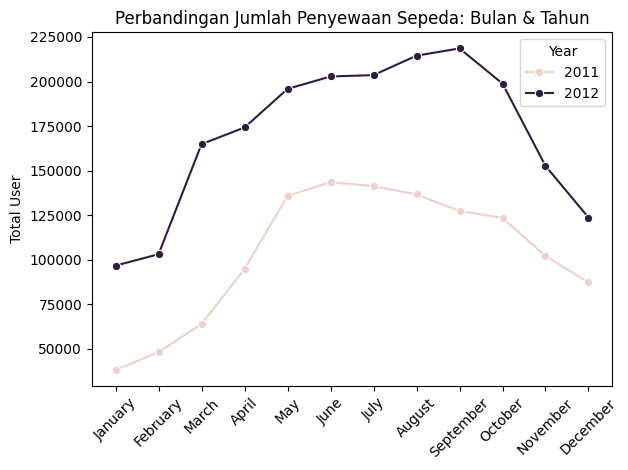

In [39]:
df_day["mnth"] = pd.Categorical(df_day["mnth"], 
    categories= ['January','February','March','April','May','June','July','August','September','October','November','December'],
    ordered=True)

monthly = df_day.groupby(by=["mnth", "yr"], observed=False).agg({
    "cnt": "sum"
}).reset_index()

sns.lineplot(
    data = monthly,
    x="mnth",
    y="cnt",
    hue="yr",
    marker = "o"
)

plt.title("Perbandingan Jumlah Penyewaan Sepeda: Bulan & Tahun")
plt.xlabel(None)
plt.xticks(rotation=45)
plt.ylabel("Total User")
plt.legend(title="Year", loc="upper right")
plt.tight_layout()
plt.show()

### Pertanyaan 2: Apakah perbedaan musim memberikan pengaruh yang signifikan terhadap terhadap jumlah user (cnt) dalam peminjaman sepeda?

In [40]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Misty/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Misty/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


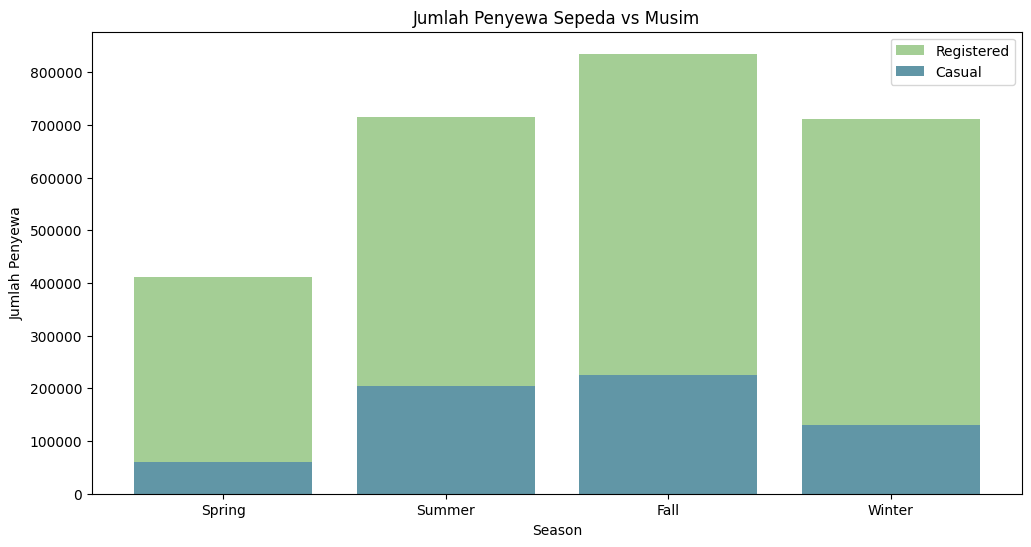

In [41]:
df_day["season"] = pd.Categorical(df_day["season"], 
    categories= ['Spring','Summer','Fall','Winter'],
    ordered=True)

plt.figure(figsize=(12, 6))
seasonal = df_day.groupby('season', observed=True)[['registered', 'casual']].sum().reset_index()
warna = ["#5F5D9C", "#6196A6", "#A4CE95", "#F4EDCC"]


plt.bar(
    seasonal['season'],
    seasonal['registered'],
    label='Registered',
    color= warna[2])

plt.bar(
    seasonal['season'],
    seasonal['casual'],
    label='Casual',
    color=warna[1])

plt.xlabel('Season')
plt.ylabel('Jumlah Penyewa')
plt.title('Jumlah Penyewa Sepeda vs Musim')
plt.legend()
plt.show()


### Pertanyaan 3: Bagaimana kondisi cuaca dapat mempengaruhi jumlah user (cnt) dalam peminjaman sepeda?

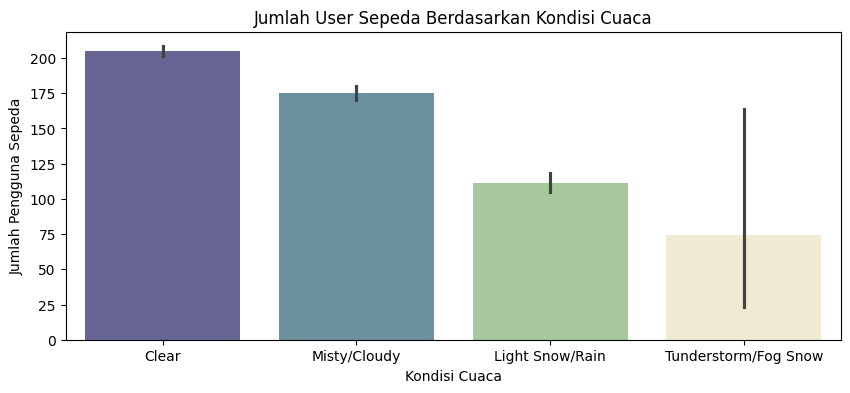

In [42]:
plt.figure(figsize=(10,4))
warna = ["#5F5D9C", "#6196A6", "#A4CE95", "#F4EDCC"]

sns.barplot(
    x='weathersit',
    y='cnt',
    hue='weathersit',
    data=df_hour,
    palette=warna,
    legend=False
    )


plt.title('Jumlah User Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

### Pertanyaan 4: Apakah terdapat korelasi antara suhu (temp) dan jumlah user (cnt) dalam peminjaman sepeda?

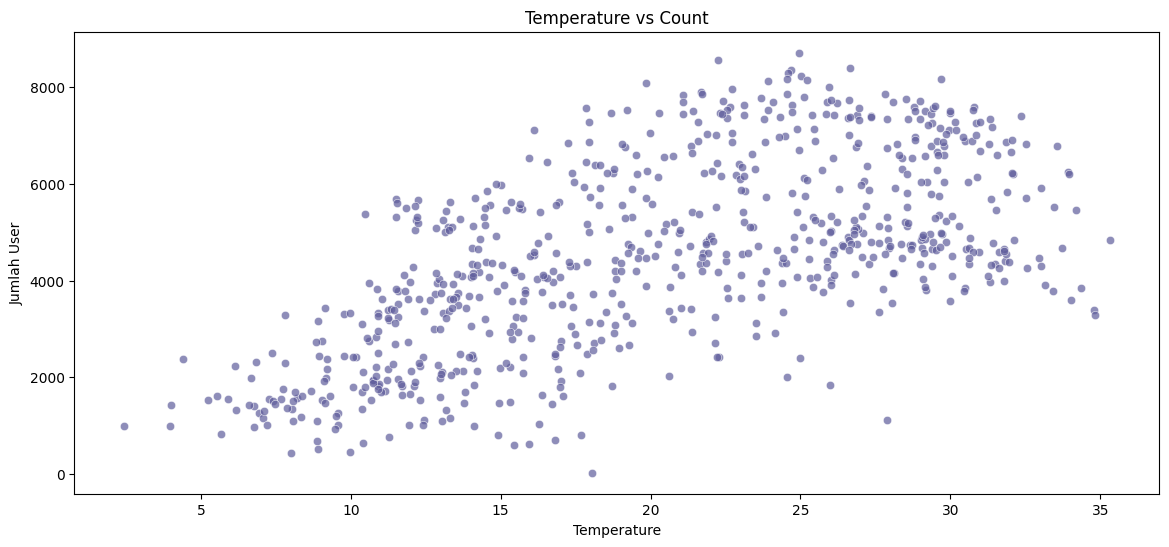

In [43]:
plt.figure(figsize=(14, 6))
warna = "#5F5D9C"
sns.scatterplot(
    x='temp',
    y='cnt',
    data=df_day,
    alpha=0.7,
    color=warna
)
plt.title('Temperature vs Count')
plt.xlabel("Temperature")
plt.ylabel("Jumlah User")
plt.show()


### Pertanyaan 5: Bagaimana persebaran jumlah user (cnt) tiap harinya (weekdays) 

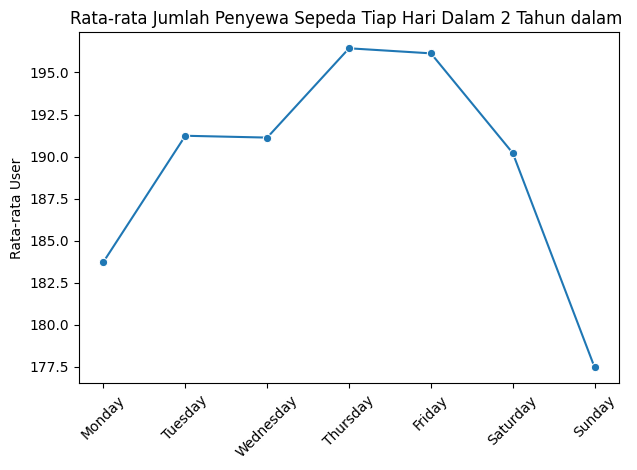

In [44]:
df_hour["weekday"] = pd.Categorical(df_hour["weekday"], 
    categories= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True)

weekly = df_hour.groupby(by=["weekday"], observed=False).agg({
    "cnt": "mean"
}).reset_index()

sns.lineplot(
    data = weekly,
    x="weekday",
    y="cnt",
    marker = "o"
)

plt.title("Rata-rata Jumlah Penyewa Sepeda Tiap Hari Dalam 2 Tahun dalam ")
plt.xlabel(None)
plt.xticks(rotation=45)
plt.ylabel("Rata-rata User")
plt.tight_layout()
plt.show()

### Pertanyaan 6: Bagaimana tren peminjaman sepeda tiap jam nya?

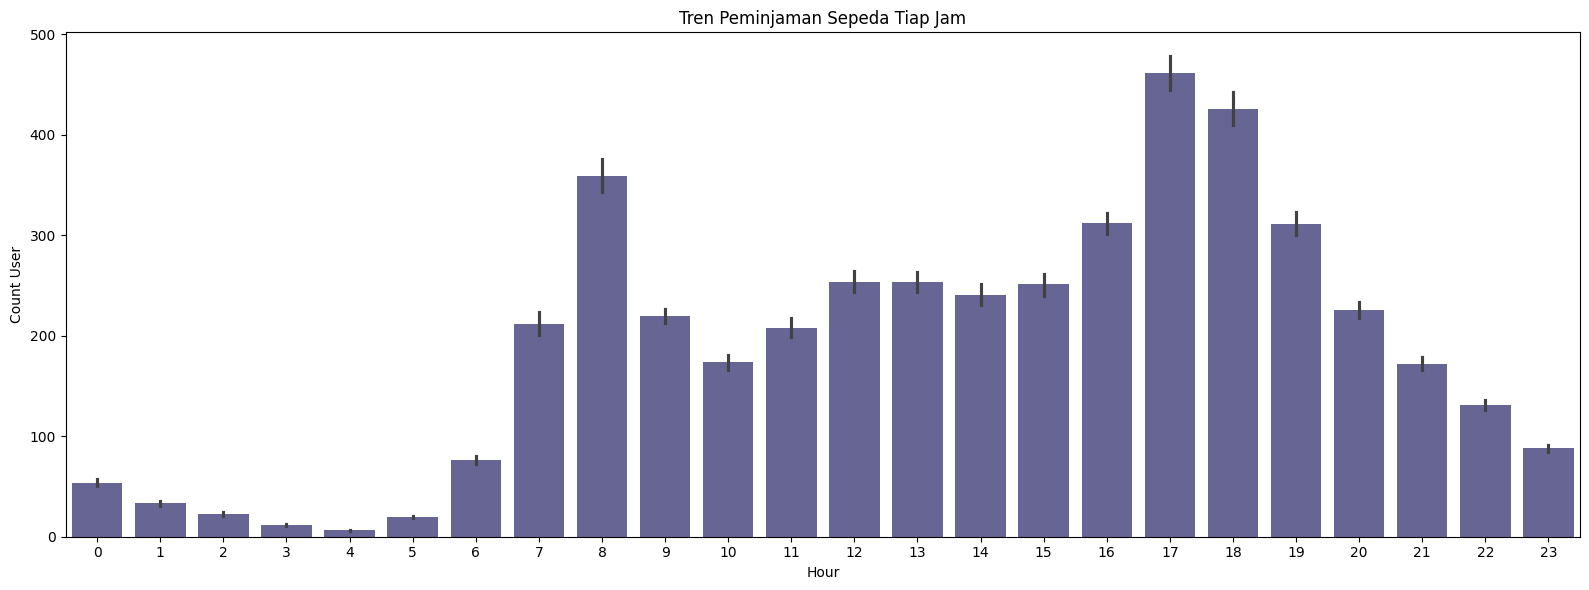

In [45]:
plt.figure(figsize=(16,6))

sns.barplot(x="hr", y="cnt", data=df_hour, color='#5F5D9C')

plt.xlabel("Hour")
plt.ylabel("Count User")
plt.title("Tren Peminjaman Sepeda Tiap Jam")

plt.tight_layout()
plt.show()

## Conclusion

#### Conclution pertanyaan 1
- Terdapat perubahan signifikan jumlah user penyewa sepeda dari tahun 2011 sampai 2012, terlihat jumlah user pada tahun 2012 lebih banyak daripada tahun sebelumnya, hal ini menandakan bisnis berkembang dengan baik.
- Selain itu pada grafik terlihat tren jumlah user tiap bulannya, telihat bahwa terjadi tren naik pada  bylan januari sampai bulan september pada tahun 2012 dan selanjutnya terjadi penurunan dari bulan september samapi desermber, pola tersebut mirip dengan tahun 2011.

#### Conclution pertanyaan 2
- Pada grafik terlihat bahwa pada saat musim gugur (fall) merupakan musim dimana penyewa sepeda terbanyak dari musim lainnya.
- Dapat kita lihat pula perbadingan antara pengguna casual dan pengguna registered pada tiap musim, terlihat bahwa pengguna registered lebih banyak daripada pengguna casual, hal ini merupakan kabar yang baik bagi perusahaan.

#### Conclution Pertanyaan 3
- Kondisi cuaca sangat mempengaruhi jumlah penyewa sepeda, seperti pada grafik saat cuaca cerah atau sedikit berawan jumlah penyewa lebih banyak daripada saat cuaca hujan atau badai petir

#### Conclution Pertanyaan 4
- Pada scatterplot tersebut terlihat bahwa temperature turut mempengaruhi jumlah penyewa sepeda, jumlah penyewa sepeda akan banyak saat temperature normal (kisaran 25 - 30 derajat)

#### Conclution Pertanyaan 5
- Dalam grafik terlihat bahwa jumlah penyewa sepeda cenderung naik dari hari senin sampai jum'at, kemudian turun saat weekend.

#### Conclution Pertanyaan 6
- Terdapat tren jumlah penyewa tiap jamnya, terlihat pada grafik jumlah penyewa sepeda meningkat saat jam 8 pagi dan jam 5 sore, sesuai dengan jam berangkat kerja dan pulang kerja
